In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
% matplotlib inline  
from PIL import Image
import numpy as np

import csv
import os

{0: [255], 480: [11], 482: [11], 483: [39], 484: [6], 481: [23], 139: [1], 143: [0], 145: [0], 467: [11], 469: [11], 470: [11], 471: [11], 472: [11], 473: [11], 474: [8], 475: [11], 477: [11]}
5325
[  0 139 143 145 467 469 470 471 472 473 474 475 477 480 481 482 483 484]
[  0   1   6   8  11  23  39 255]


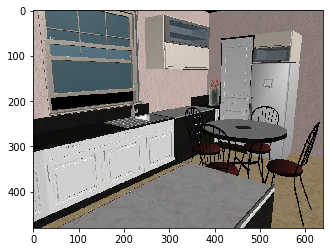

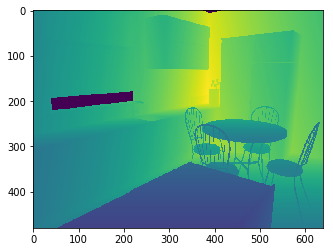

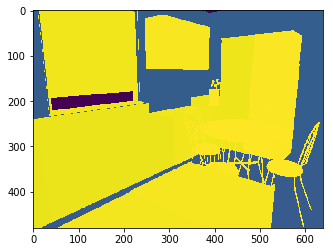

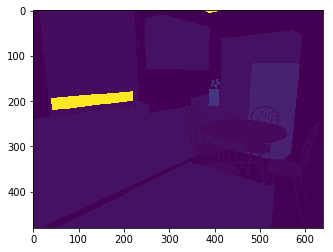

In [2]:
# Check original data
# There are totally 651798 folders, each folder contain around 5-10 images
data_dir = '/media/yi/DATA/data-orig/MLT'

img_name = os.path.join(data_dir, 'image/fffeb1ec4c22ee4b96aa8f8acc564721/000000_color.jpg')
depth_name = os.path.join(data_dir, 'depth/fffeb1ec4c22ee4b96aa8f8acc564721/000000_depth.png')
node_name = os.path.join(data_dir, 'node/fffeb1ec4c22ee4b96aa8f8acc564721/000000_node.png')
category_name = os.path.join(data_dir, 'category/fffeb1ec4c22ee4b96aa8f8acc564721/000000_category40.png')
# img_name = os.path.join(data_dir, 'image/fffeb1ec4c22ee4b96aa8f8acc564721/000011_color.jpg')
# depth_name = os.path.join(data_dir, 'depth/fffeb1ec4c22ee4b96aa8f8acc564721/000011_depth.png')
# node_name = os.path.join(data_dir, 'node/fffeb1ec4c22ee4b96aa8f8acc564721/000011_node.png')
# category_name = os.path.join(data_dir, 'category/fffeb1ec4c22ee4b96aa8f8acc564721/000011_category40.png')
# img_name = os.path.join(data_dir, 'image/fffe2b0adeef7ffb6d3836404de7a640/000000_color.jpg')
# depth_name = os.path.join(data_dir, 'depth/fffe2b0adeef7ffb6d3836404de7a640/000000_depth.png')
# node_name = os.path.join(data_dir, 'node/fffe2b0adeef7ffb6d3836404de7a640/000000_node.png')
# category_name = os.path.join(data_dir, 'category/fffe2b0adeef7ffb6d3836404de7a640/000000_category40.png')

im = np.array(Image.open(img_name), dtype=np.uint8)
depth = np.array(Image.open(depth_name))
node = np.array(Image.open(node_name))
category = np.array(Image.open(category_name))

hash_map = dict()
for i in range(node.shape[0]):
    for j in range(node.shape[1]):
        element = node[i, j]
        if element not in hash_map:
            hash_map[element] = [category[i, j]]
        elif category[i, j] not in hash_map[element]:
            hash_map[element].append(category[i, j])

print hash_map

print np.max(depth)
print np.unique(node)
print np.unique(category)

fig, ax = plt.subplots(1)
ax.imshow(im)

fig, ax = plt.subplots(1)
ax.imshow(depth)

fig, ax = plt.subplots(1)
ax.imshow(node)

fig, ax = plt.subplots(1)
ax.imshow(category)

['0 228 199 476 4\n', '386 257 640 480 4\n', '100 325 396 480 6\n']
[['0', '228', '199', '476', '4'], ['386', '257', '640', '480', '4'], ['100', '325', '396', '480', '6']]
[[  0. 228. 199. 476.   4.]
 [386. 257. 640. 480.   4.]
 [100. 325. 396. 480.   6.]]
49352.0
222.15310036098978


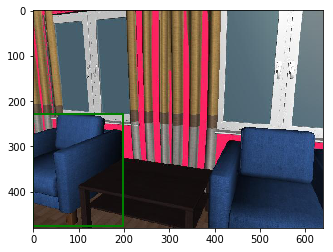

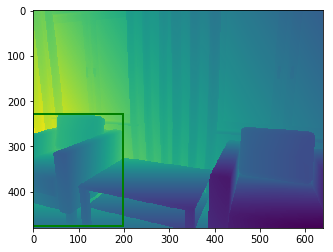

In [6]:
# Check data after filtering
img_name = os.path.join('/media/yi/DATA/data-orig/MLT/image/0004d52d1aeeb8ae6de39d6bd993e992/000000_color.jpg')
depth_name = os.path.join('/media/yi/DATA/data-orig/MLT/depth/0004d52d1aeeb8ae6de39d6bd993e992/000000_depth.png')
box_name = os.path.join('/home/yi/code/few_shot/mlt/box/0004d52d1aeeb8ae6de39d6bd993e992/000000.txt')

box = []
with open(box_name) as txt_file:
    box_info = txt_file.readlines()
print(box_info)
for row in box_info:
    row = row.strip().split(' ')
    box.append(row)
print box
box = np.array(box).astype(np.float)        
print box

im = np.array(Image.open(img_name), dtype=np.uint8)
depth = np.array(Image.open(depth_name))

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
a = box[0, 0:4]
box_area = (a[2] - a[0]) * (a[3] - a[1])
box_size = np.sqrt((a[2] - a[0]) * (a[3] - a[1]))
print(box_area)
print(box_size)
rect = patches.Rectangle((a[0], a[1]),a[2]-a[0],a[3]-a[1],linewidth=2,edgecolor='g',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

# plt.show()

fig,ax = plt.subplots(1)

ax.imshow(depth)

rect = patches.Rectangle((a[0], a[1]),a[2]-a[0],a[3]-a[1],linewidth=2,edgecolor='g',facecolor='none')
ax.add_patch(rect)
